In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
cd /content/drive/MyDrive/ML-LaDECO/LaDECO

/content/drive/MyDrive/ML-LaDECO/LaDECO


In [28]:
import numpy as np

print('Project MLaDECO')
print('Author: Viswambhar Yasa')
print('Software version: 0.1')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras import models
from thermograms.Utilities import Utilities
from ml_training.dataset_generation.fourier_transformation import fourier_transformation
from ml_training.dataset_generation.principal_componant_analysis import principal_componant_analysis
from utilites.segmentation_colormap_anno import segmentation_colormap_anno
from utilites.tolerance_maks_gen import tolerance_predicted_mask
import matplotlib.pyplot as plt

Project MLaDECO
Author: Viswambhar Yasa
Software version: 0.1


In [4]:
root_path = r'utilites/datasets'
data_file_name = r'material_thickness_1000W.hdf5'
thermal_class = Utilities()
thermal_data,experiment_list=thermal_class.open_file(root_path, data_file_name,True)
experiment_name=r'2021-12-07-Materialstudie-5.2-40µmS1013-1000W-10s'
experimental_data=thermal_data[experiment_name] 

Experiments in the file 

1  :  2021-12-07-Materialstudie-5.1-EW38-505-1000W-10s
2  :  2021-12-07-Materialstudie-5.2-40µmS1013-1000W-10s
3  :  2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-10s
4  :  2021-12-07-Materialstudie-7.1-EW38-505-1000W-10s
5  :  2021-12-07-Materialstudie-7.2-EW38-505_40 µmS1013-1000W-10s
6  :  2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-10s
7  :  2021-12-07-Materialstudie-7.4-minS1013-1000W-10s
8  :  2021-12-07-Materialstudie-7.5-20µmS1013-1000W-10s
9  :  2021-12-07-Materialstudie-7.5-20µmS1013-150W-10s
10  :  2021-12-07-Materialstudie-7.6-60µmS1013-1000W-10s
11  :  2021-12-07-Materialstudie-7.7-80µmS1013-1000W-10s
12  :  2021-12-07-Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-10s
13  :  2021-12-07-Materialstudie-8.3-40µmS1013_40 µmS3003rot-1000W-10s
14  :  2021-12-07-Materialstudie-8.4-40µmS101340µmS5010_blau-1000W-10s
15  :  2021-12-07-Materialstudie-8.5-40µmS1013_40µmS6018_grün-1000W-10s
16  :  2021-12-07-Materialstudie-8

In [5]:
experiment_thickness=[]
for experiment in experiment_list.values():
  index=0
  thickness=0
  while True:
    index = experiment.find("µm",index+1)
    if index==-1:
      break
    thickness+=int(experiment[index-2:index])*0.001
  print(experiment,':',thickness)
  experiment_thickness.append(thickness)

2021-12-07-Materialstudie-5.1-EW38-505-1000W-10s : 0
2021-12-07-Materialstudie-5.2-40µmS1013-1000W-10s : 0.04
2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-10s : 0.08
2021-12-07-Materialstudie-7.1-EW38-505-1000W-10s : 0
2021-12-07-Materialstudie-7.2-EW38-505_40 µmS1013-1000W-10s : 0.0
2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-10s : 0.08
2021-12-07-Materialstudie-7.4-minS1013-1000W-10s : 0
2021-12-07-Materialstudie-7.5-20µmS1013-1000W-10s : 0.02
2021-12-07-Materialstudie-7.5-20µmS1013-150W-10s : 0.02
2021-12-07-Materialstudie-7.6-60µmS1013-1000W-10s : 0.06
2021-12-07-Materialstudie-7.7-80µmS1013-1000W-10s : 0.08
2021-12-07-Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-10s : 0.08
2021-12-07-Materialstudie-8.3-40µmS1013_40 µmS3003rot-1000W-10s : 0.04
2021-12-07-Materialstudie-8.4-40µmS101340µmS5010_blau-1000W-10s : 0.08
2021-12-07-Materialstudie-8.5-40µmS1013_40µmS6018_grün-1000W-10s : 0.08
2021-12-07-Materialstudie-8.6-40µmS1013_40µm_S9005_schwarz-10

In [6]:
experiment_thickness[4]=0.04
experiment_thickness[12]=0.08

In [7]:
number_of_classes=15

In [8]:
bins=np.linspace(0.001,0.1,number_of_classes+1)

In [9]:
bins

array([0.001 , 0.0076, 0.0142, 0.0208, 0.0274, 0.034 , 0.0406, 0.0472,
       0.0538, 0.0604, 0.067 , 0.0736, 0.0802, 0.0868, 0.0934, 0.1   ])

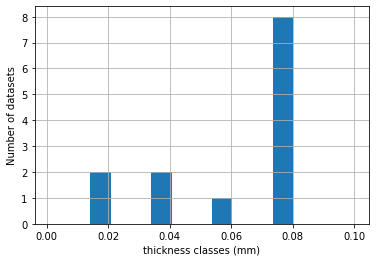

In [10]:
plt.hist(experiment_thickness, bins)
plt.xlabel('thickness classes (mm)')
plt.ylabel('Number of datasets')
plt.grid()

In [11]:
count, _ = np.histogram(experiment_thickness, bins)

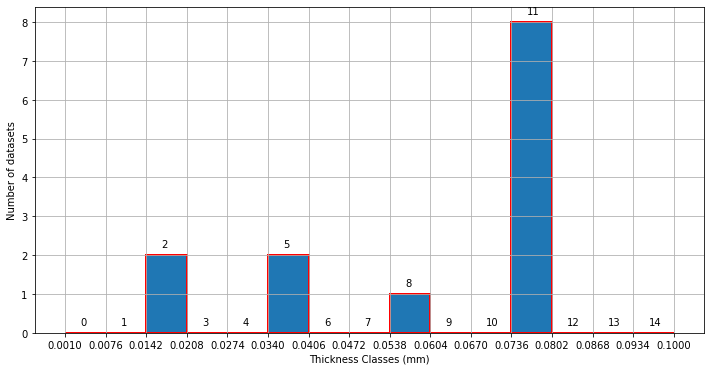

In [12]:
plt.figure(figsize=(12,6))
plt.hist(experiment_thickness, bins, edgecolor='red',
              linewidth=2)
plt.xlabel('Thickness Classes (mm)')
plt.ylabel('Number of datasets')
plt.xticks(bins);
plt.grid()
i=0
for x,y in zip(bins,count):
  plt.text(x+0.0025, y+0.2, i, fontsize=10)
  i+=1

In [13]:
thickness_classes=np.digitize(experiment_thickness,bins)

In [14]:
thickness_classes

array([ 0,  6, 12,  0,  6, 12,  0,  3,  3,  9, 12, 12, 12, 12, 12, 12,  0,
        0,  0])

In [15]:
import tensorflow as tf 

In [16]:
EOF=principal_componant_analysis(np.array(experimental_data))

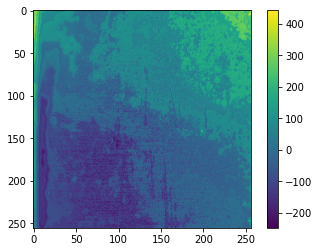

In [17]:
plt.imshow(np.squeeze(EOF))
plt.colorbar()

In [18]:
input_data,ref_st_index,ref_end_index=fourier_transformation(experimental_data)

reflection_start_index:  271   reflection_end_index:  1490
The size of filtered data: (256, 256, 1219)


In [19]:
from ml_training.dataset_generation.data_preprocessing import thickness_data_preprocessing

2021-12-07-Materialstudie-5.1-EW38-505-1000W-10s
reflection_start_index: 334 reflection_end_index: 834
2021-12-07-Materialstudie-5.2-40µmS1013-1000W-10s
reflection_start_index: 273 reflection_end_index: 659
2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-10s
reflection_start_index: 428 reflection_end_index: 929
2021-12-07-Materialstudie-7.1-EW38-505-1000W-10s
reflection_start_index: 363 reflection_end_index: 725
2021-12-07-Materialstudie-7.2-EW38-505_40 µmS1013-1000W-10s
reflection_start_index: 469 reflection_end_index: 854
2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-10s
reflection_start_index: 390 reflection_end_index: 892
2021-12-07-Materialstudie-7.4-minS1013-1000W-10s
reflection_start_index: 304 reflection_end_index: 804
2021-12-07-Materialstudie-7.5-20µmS1013-1000W-10s
reflection_start_index: 461 reflection_end_index: 960
2021-12-07-Materialstudie-7.5-20µmS1013-150W-10s
reflection_start_index: -5 reflection_end_index: 807
2021-12-07-Materialstudie-7.

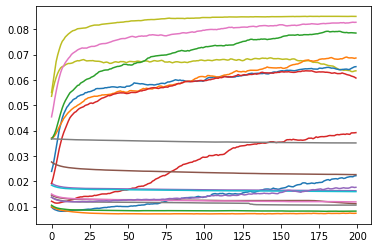

In [20]:
x_train_ds=thickness_data_preprocessing(thermal_data,experiment_list)

In [21]:
y_train_ds=tf.one_hot(thickness_classes,number_of_classes)

In [22]:
x_train_ds.shape,y_train_ds.shape

(TensorShape([19, 1, 200]), TensorShape([19, 15]))

In [29]:
from therml.ml_models import Thickness_estimation

In [30]:
thickness_nn=Thickness_estimation()

In [32]:
thickness_model_Bi_LSTM=thickness_nn.thickness_model(type='Bi-LSTM')

In [33]:
thickness_model_Bi_LSTM.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.losses.categorical_crossentropy,
                        metrics=['accuracy'])

In [34]:
from sklearn.utils import class_weight

In [35]:
weights=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(thickness_classes),y=thickness_classes)

In [36]:
inbalanced_weight=dict(zip(np.unique(thickness_classes),weights))

In [37]:
inbalanced_weight

{0: 0.6333333333333333, 3: 1.9, 6: 1.9, 9: 3.8, 12: 0.475}

In [38]:
for i in range(number_of_classes):
  if i in inbalanced_weight:
    continue
  else:
    inbalanced_weight[i]=0.0

In [39]:
inbalanced_weight

{0: 0.6333333333333333,
 1: 0.0,
 2: 0.0,
 3: 1.9,
 4: 0.0,
 5: 0.0,
 6: 1.9,
 7: 0.0,
 8: 0.0,
 9: 3.8,
 10: 0.0,
 11: 0.0,
 12: 0.475,
 13: 0.0,
 14: 0.0}

In [40]:
stopping_criteria=tf.keras.callbacks.EarlyStopping(monitor='accuracy', baseline=0.90, patience=5)

In [41]:
model_history=thickness_model_Bi_LSTM.fit(x_train_ds,y_train_ds,epochs=500,class_weight=inbalanced_weight,shuffle=True,batch_size=8
                                                )

Epoch 1/500
3/3 [==============================] - 9s 14ms/step - loss: 2.7075 - accuracy: 0.0526
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 2.6954 - accuracy: 0.2632
Epoch 3/500
3/3 [==============================] - 0s 7ms/step - loss: 2.6851 - accuracy: 0.1579
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 2.6699 - accuracy: 0.1053
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 2.6479 - accuracy: 0.1053
Epoch 6/500
3/3 [==============================] - 0s 7ms/step - loss: 2.6026 - accuracy: 0.0526
Epoch 7/500
3/3 [==============================] - 0s 7ms/step - loss: 2.4958 - accuracy: 0.1579
Epoch 8/500
3/3 [==============================] - 0s 7ms/step - loss: 2.2759 - accuracy: 0.3158
Epoch 9/500
3/3 [==============================] - 0s 7ms/step - loss: 1.9415 - accuracy: 0.3158
Epoch 10/500
3/3 [==============================] - 0s 7ms/step - loss: 1.7252 - accuracy: 0.3158
Epoch 11/500
3/3 [==========

In [42]:
model_para=model_history.history

In [43]:
model_para=model_history.history
path=r'trained_models\LSTM\model_history'

In [44]:
filename="\Bi_LSTM.pkl"
file_path=path+filename
import pickle

# define dictionary

# create a binary pickle file 
f = open(file_path,"wb")

# write the python object (dict) to pickle file
pickle.dump(model_para,f)
# close file
f.close()

In [45]:
thickness_model_Bi_LSTM.evaluate(x_train_ds,y_train_ds)

1/1 [==============================] - 1s 1s/step - loss: 0.9995 - accuracy: 0.3684


[0.9995410442352295, 0.3684210479259491]

In [46]:
y_predicted=thickness_model_Bi_LSTM.predict_on_batch(x_train_ds)

In [47]:
thickness_classes,np.argmax(y_predicted,axis=1)

(array([ 0,  6, 12,  0,  6, 12,  0,  3,  3,  9, 12, 12, 12, 12, 12, 12,  0,
         0,  0]),
 array([12,  6,  6,  0,  9,  0,  0,  3,  3,  9,  3,  3,  3,  3,  9,  0,  3,
         0,  3]))

In [48]:
x_train_ds.shape

TensorShape([19, 1, 200])

In [49]:
thickness_classes
y_pred=np.argmax(y_predicted,axis=1)

(0.0, 240.0)

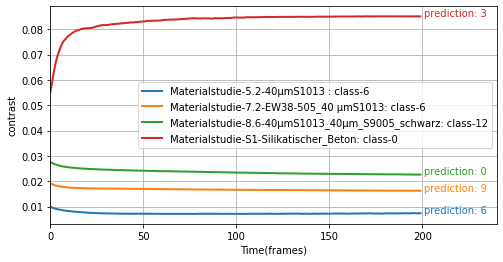

In [50]:
plt.figure(figsize=(8,4))
plt.plot(np.squeeze(x_train_ds[1,:,:]),label="Materialstudie-5.2-40µmS1013 : class-"+str(thickness_classes[1]),linewidth=2)
plt.plot(np.squeeze(x_train_ds[4,:,:]),label="Materialstudie-7.2-EW38-505_40 µmS1013: class-"+str(thickness_classes[4]),linewidth=2)
plt.plot(np.squeeze(x_train_ds[-4,:,:]),label="Materialstudie-8.6-40µmS1013_40µm_S9005_schwarz: class-"+str(thickness_classes[-4]),linewidth=2)
plt.plot(np.squeeze(x_train_ds[-1,:,:]),label="Materialstudie-S1-Silikatischer_Beton: class-"+str(thickness_classes[-1]),linewidth=2)

plt.legend()
plt.text(201,np.squeeze(x_train_ds[1,:,-1]),'prediction: '+str(y_pred[1]),color='tab:blue')
plt.text(201,np.squeeze(x_train_ds[4,:,-1]),'prediction: '+str(y_pred[4]),color='tab:orange')
plt.text(201,np.squeeze(x_train_ds[-4,:,-1]),'prediction: '+str(y_pred[-4]),color='tab:green')
plt.text(201,np.squeeze(x_train_ds[-1,:,-1]),'prediction: '+str(y_pred[-1]),color='tab:red')
plt.xlabel('Time(frames)')
plt.ylabel('contrast')
plt.grid()
plt.xlim(0,240)
#plt.savefig("/content/thermal_coating_thickness_1.png",dpi=100,bbox_inches='tight',transparent=True)

In [51]:
model_save_path=r'trained_models\LSTM'

In [52]:
model_name=r'\Bi_LSTM.h5'
model_path=model_save_path+model_name
thickness_model_Bi_LSTM.save(model_path,overwrite=False)

In [53]:
j=1
pr=np.expand_dims(x_train_ds[j,:,:],axis=0)
thickness=thickness_model_Bi_LSTM.predict(pr)
index=np.argmax(thickness)
index,experiment_thickness[j]

(6, 0.04)

In [54]:
j=6
pr=np.expand_dims(x_train_ds[j,:,:],axis=0)
thickness=thickness_model_Bi_LSTM.predict(pr)
index=np.argmax(thickness)
index,experiment_thickness[j]

(0, 0)

In [55]:
root_path = r'utilites/datasets'
data_file_name = r'material_thickness_1000W_5s.hdf5'
a = Utilities()
thermal_test_data,experiment_test_list=a.open_file(root_path, data_file_name,True)
    #experiment = '2021-05-11 - Variantenvergleich - VarioTherm Halogenlampe - Winkel 45°'
experiment_name=r'2021-12-07-Materialstudie-5.2-40µmS1013-1000W-5s'
experimental_data=thermal_test_data[experiment_name] 

Experiments in the file 

1  :  2021-12-07 -Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-5s
2  :  2021-12-07-Materialstudie-5.2-40µmS1013-1000W-5s
3  :  2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-5s
4  :  2021-12-07-Materialstudie-7.2-EW38-505_40µmS1013-1000W-5s
5  :  2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-5s
6  :  2021-12-07-Materialstudie-7.4-minS1013-1000W-5s
7  :  2021-12-07-Materialstudie-7.5-20µmS1013-1000W-5s
8  :  2021-12-07-Materialstudie-7.6-60µmS1013-1000W-5s
9  :  2021-12-07-Materialstudie-7.7-80µmS1013-1000W-5s
10  :  2021-12-07-Materialstudie-8.3-40µmS1013_40µmS3003rot-1000W-5s
11  :  2021-12-07-Materialstudie-8.4-40µmS1013_40µmS5010blau-1000W-5s
12  :  2021-12-07-Materialstudie-8.5-40µmS1013_40µm_S6018grün-1000W-5s
13  :  2021-12-07-Materialstudie-8.6-40µmS1013_40µmS9005schwarz-1000W-5s


A total of 13 experiments are loaded in file  



2021-12-07 -Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-5s
reflection_start_index: 458 reflection_end_index: 707
2021-12-07-Materialstudie-5.2-40µmS1013-1000W-5s
reflection_start_index: 450 reflection_end_index: 701
2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-5s
reflection_start_index: 451 reflection_end_index: 700
2021-12-07-Materialstudie-7.2-EW38-505_40µmS1013-1000W-5s
reflection_start_index: 494 reflection_end_index: 744
2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-5s
reflection_start_index: 439 reflection_end_index: 691
2021-12-07-Materialstudie-7.4-minS1013-1000W-5s
reflection_start_index: 383 reflection_end_index: 634
2021-12-07-Materialstudie-7.5-20µmS1013-1000W-5s
reflection_start_index: 463 reflection_end_index: 713
2021-12-07-Materialstudie-7.6-60µmS1013-1000W-5s
reflection_start_index: 393 reflection_end_index: 644
2021-12-07-Materialstudie-7.7-80µmS1013-1000W-5s
reflection_start_index: 438 reflection_end_index: 689
2021-12-07-Material

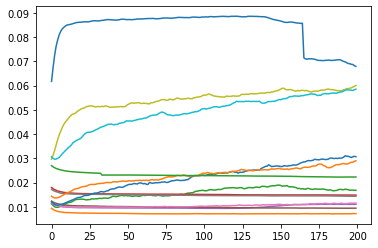

In [56]:
x_test_ds=thickness_data_preprocessing(thermal_test_data,experiment_test_list)

In [57]:
experiment_test_thickness=[]
for experiment in experiment_test_list.values():
  index=0
  thickness=0
  while True:
    index = experiment.find("µm",index+1)
    if index==-1:
      break
    thickness+=int(experiment[index-2:index])*0.001
  print(experiment,':',thickness)
  experiment_test_thickness.append(thickness)

2021-12-07 -Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-5s : 0.08
2021-12-07-Materialstudie-5.2-40µmS1013-1000W-5s : 0.04
2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-5s : 0.08
2021-12-07-Materialstudie-7.2-EW38-505_40µmS1013-1000W-5s : 0.04
2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-5s : 0.08
2021-12-07-Materialstudie-7.4-minS1013-1000W-5s : 0
2021-12-07-Materialstudie-7.5-20µmS1013-1000W-5s : 0.02
2021-12-07-Materialstudie-7.6-60µmS1013-1000W-5s : 0.06
2021-12-07-Materialstudie-7.7-80µmS1013-1000W-5s : 0.08
2021-12-07-Materialstudie-8.3-40µmS1013_40µmS3003rot-1000W-5s : 0.08
2021-12-07-Materialstudie-8.4-40µmS1013_40µmS5010blau-1000W-5s : 0.08
2021-12-07-Materialstudie-8.5-40µmS1013_40µm_S6018grün-1000W-5s : 0.08
2021-12-07-Materialstudie-8.6-40µmS1013_40µmS9005schwarz-1000W-5s : 0.08


In [58]:
thickness_classes=np.digitize(experiment_test_thickness,bins)

In [59]:
y_test_ds=tf.one_hot(thickness_classes,number_of_classes)

In [60]:
thickness_model_Bi_LSTM.evaluate(x_test_ds,y_test_ds)

1/1 [==============================] - 0s 21ms/step - loss: 1.3503 - accuracy: 0.4615


[1.350297212600708, 0.4615384638309479]

In [61]:
thickness_model_Bi_LSTM.evaluate(x_test_ds,y_test_ds)

1/1 [==============================] - 0s 17ms/step - loss: 1.3503 - accuracy: 0.4615


[1.350297212600708, 0.4615384638309479]